# Autoencoder Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [2]:
!python3 ConvolutionalAutoEncoder.py --max_epochs=5

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type       | Params | In sizes        | Out sizes      
---------------------------------------------------------------------------
0 | encoder | Sequential | 740    | [64, 1, 28, 28] | [64, 4, 7, 7]  
1 | decoder | Sequential | 337    | [64, 4, 7, 7]   | [64, 1, 28, 28]
Epoch 0:  83%|█████████▏ | 782/939 [00:21<00:04, 36.04it/s, loss=0.140, v_num=3]
Validating: 0it [00:00, ?it/s]
Epoch 0:  99%|██████████▉| 933/939 [00:24<00:00, 37.54it/s, loss=0.140, v_num=3]
Epoch 0: 100%|█| 939/939 [00:25<00:00, 37.00it/s, loss=0.140, v_num=3, val_loss=
Epoch 1:  83%|▊| 782/939 [00:22<00:04, 34.67it/s, loss=0.130, v_num=3, val_loss=
Validating: 0it [00:00, ?it/s]
Epoch 1:  83%|▊| 784/939 [00:24<00:04, 31.99it/s, loss=0.130, v_num=3, val_loss=
Epoch 1:  85%|▊| 800/939 [00:24<00:04, 32.50it/s, loss=0.130, v_num=3, val_loss=
Epoch 1:  87%|▊| 816/939 [00:24<00:03, 33.02it/s, loss=0.130, v_num=3, val_loss=
Epoch 1: 

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs


In [5]:
!tensorboard --logdir=./lightning_logs

W0909 18:20:45.159752 123145513140224 plugin_event_accumulator.py:321] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0909 18:20:45.159973 123145513140224 plugin_event_accumulator.py:359] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [9]:
__import__("sys").path.append("..")
import utils
from ConvolutionalAutoEncoder import ConvolutionalAutoEncoder

model = utils.load_trained_model_for_evaluation(ConvolutionalAutoEncoder, 0)
print(model)

ConvolutionalAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


## Generate similar MNIST images

     Original image <----> Generated Image


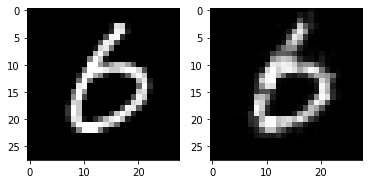

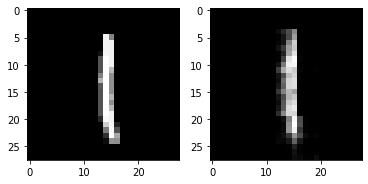

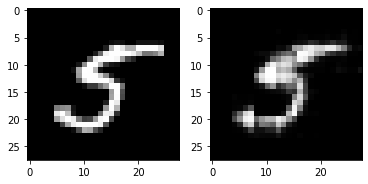

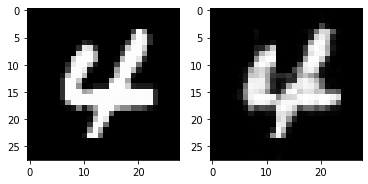

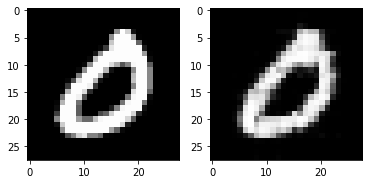

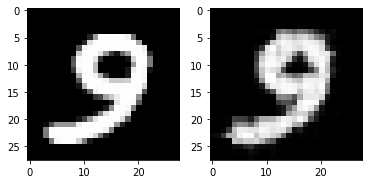

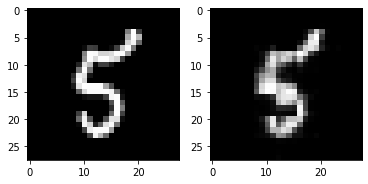

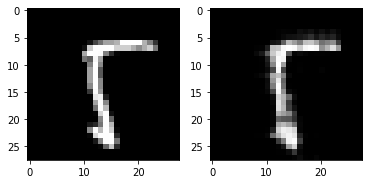

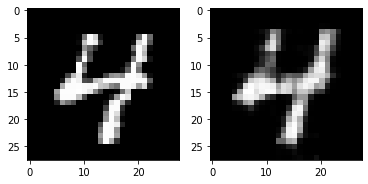

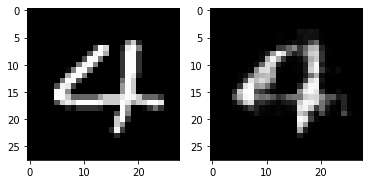

In [14]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

print("     Original image <----> Generated Image")

for i in range(0, 10):
    orig_img, _ = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    predicted_img = model(orig_img).detach()
    utils.plot_images([orig_img.view(28, 28), predicted_img.view(28, 28)])